In [2]:
from pathlib import Path
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt

In [3]:
images_root="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/images"
# features_dir="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD_1/features/dino_vits16"
features_dir="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/features/"
output_dir="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs_dot1PCA64linearpredlinear_dssubmax_10"
which_matrix= 'laplacian'
which_color_matrix= 'knn'
which_features= 'k'
normalize=True
threshold_at_zero=True
lapnorm= True
K= 5
image_downsample_factor = None
image_color_lambda = 0.0
multiprocessing = 0
batch_size=2
epochs=10

In [4]:
inputs = list(enumerate(sorted(Path(features_dir).iterdir())))
for inp in tqdm(inputs[:1]):
    index, features_file = inp
    print(index, features_file)
     # Load
    data_dict = torch.load(features_file, map_location='cpu')
    print(data_dict.keys())   #['k', 'indices', 'file', 'id', 'model_name', 'patch_size', 'shape']
    img_feat=data_dict['shape']
    image_id = data_dict['file'][:-4]
    print(image_id)
    # Load
    output_file = str(Path(output_dir) / f'{image_id}.pth')
    if Path(output_file).is_file():
        print(f'Skipping existing file {str(output_file)}')
        # break
        # return  # skip because already generated

    # Load affinity matrix
    feats = data_dict[which_features].squeeze().cuda()
    print(feats.shape)
    print(len(img_feat))


  0%|          | 0/1 [00:00<?, ?it/s]

0 /home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/features/0001_resized.pth
dict_keys(['k', 'indices', 'file', 'id', 'model_name', 'patch_size', 'shape'])
0001_resized
Skipping existing file /home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs_dot1PCA64linearpredlinear_dssubmax_10/0001_resized.pth


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

torch.Size([1024, 384])
4


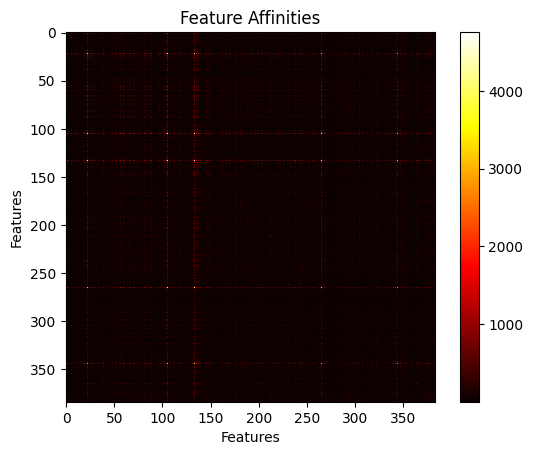

In [6]:
feats=feats.cpu()
correlation_matrix = torch.abs(torch.mm(feats.t(), feats))
plt.imshow(correlation_matrix.detach().numpy(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Feature Affinities')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
